In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset
The dataset contains data regarding the amount invested in various departments belonging to different startups and the profit each startup has made. The dataset has no null values and does not require to be cleaned.

In [3]:
data=pd.read_csv("/Volumes/YE/projects/startups/data/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Exploratory Data Analysis
Performing descriptive analysis on the dataset.

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


It is seen that:  
Approximately 73,000 is spent on Research & Development by about 50% of the startups.  
Approximately 1,22,700 is spent on Administration by about 50% of the startups.  
Approximately 2,12,700 is spent on Marketing by about 50% of the startups.
Based on the data, on average ,a startup makes approximately 1,12,000, with a small variance among the startups, with more than 1,07,900 made by 50% of the startups.  

It can also be seen that most startups are more focused either on Marketing or Administration than R&D.  
The startups invest similarly on Administration when compared to R&D and Marketing, where the startups differ with their investments greatly(When considering R&D and Marketing).

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


It is seen that R&D spend and Profit have the highest correlation leading to a strong linear relationship with each other (Meaning an increase in R&D investment might directly effect an increase in Profit).  
It is also seen that Marketing Spend has a positive correlation (Although not high correlation) with Profit.  
Administration is seen to have very little effect or correlation on the Profit. 
A problem that arises is due to the correlation between R&D and Marketing which might cause multicollinearity which further effects our analysis and predictions.  
To further confirm the presence of multicollinearity we calculate the Variance Inflation Factor (VIF).

In [16]:
import statsmodels.api as sm

In [26]:
test=pd.get_dummies(data,columns=['State'])
test

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [27]:
test=sm.add_constant(test)
test.head()

,const,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,1.0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1.0,162597.70,151377.59,443898.53,191792.06,1,0,0
2,1.0,153441.51,101145.55,407934.54,191050.39,0,1,0
3,1.0,144372.41,118671.85,383199.62,182901.99,0,0,1
4,1.0,142107.34,91391.77,366168.42,166187.94,0,1,0


In [32]:
test=test.drop('Profit',axis=1)
test=test.drop('State_New York',axis=1)
test.head()

,const,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,1.0,165349.20,136897.80,471784.10,0,0
1,1.0,162597.70,151377.59,443898.53,1,0
2,1.0,153441.51,101145.55,407934.54,0,1
3,1.0,144372.41,118671.85,383199.62,0,0
4,1.0,142107.34,91391.77,366168.42,0,1


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif=pd.Series([variance_inflation_factor(test.values,i)
              for i in range(test.shape[1])],index=test.columns)
print(vif)

const               27.126379
R&D Spend            2.495511
Administration       1.177766
Marketing Spend      2.416797
State_California     1.335061
State_Florida        1.361299
dtype: float64


In [34]:
test=test.drop('const',axis=1)
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [35]:
vif=pd.Series([variance_inflation_factor(test.values,i)
              for i in range(test.shape[1])],index=test.columns)
print(vif)

R&D Spend           8.604798
Administration      5.573480
Marketing Spend     8.122776
State_California    1.891418
State_Florida       1.957715
dtype: float64


In [37]:
test2=test
test2=test2.drop('Marketing Spend',axis=1)
test2.head()

,R&D Spend,Administration,State_California,State_Florida
0,165349.20,136897.80,0,0
1,162597.70,151377.59,1,0
2,153441.51,101145.55,0,1
3,144372.41,118671.85,0,0
4,142107.34,91391.77,0,1


In [38]:
vif=pd.Series([variance_inflation_factor(test2.values,i)
              for i in range(test2.shape[1])],index=test2.columns)
print(vif)

R&D Spend           3.871451
Administration      5.514143
State_California    1.865181
State_Florida       1.830268
dtype: float64


In [39]:
test2=sm.add_constant(test2)
test2.head()

,const,R&D Spend,Administration,State_California,State_Florida
0,1.0,165349.20,136897.80,0,0
1,1.0,162597.70,151377.59,1,0
2,1.0,153441.51,101145.55,0,1
3,1.0,144372.41,118671.85,0,0
4,1.0,142107.34,91391.77,0,1


In [40]:
vif=pd.Series([variance_inflation_factor(test2.values,i)
              for i in range(test2.shape[1])],index=test2.columns)
print(vif)

const               22.575481
R&D Spend            1.086436
Administration       1.062655
State_California     1.335061
State_Florida        1.322272
dtype: float64


By dropping the Marketing Spend we have solved the possibility of the existence of multicollinearity. However we will test the model both with and without Marketing Spend to further analyse its effects.

<AxesSubplot: xlabel='State', ylabel='Profit'>

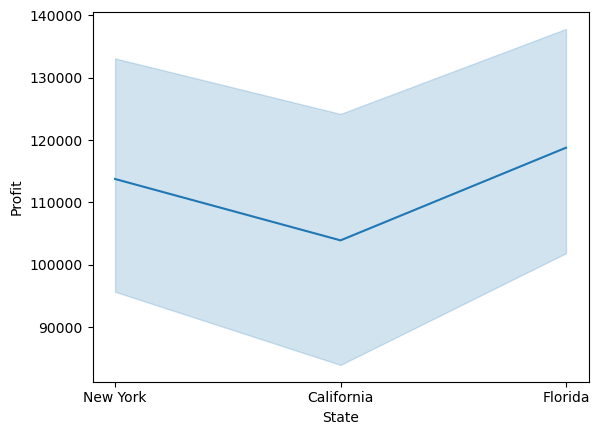

In [244]:
sns.lineplot(x='State',y='Profit',data=data)

It is seen that Florida has the Maximum Profit. Further analysis is done to see why so.

In [245]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [252]:
data.query('State=="New York"')['Profit'].describe()

count        17.000000
mean     113756.446471
std       41140.258117
min       35673.410000
25%       96479.510000
50%      108552.040000
75%      129917.040000
max      192261.830000
Name: Profit, dtype: float64

In [253]:
data.query('State=="California"')['Profit'].describe()

count        17.000000
mean     103905.175294
std       44446.359357
min       14681.400000
25%       78239.910000
50%       97427.840000
75%      134307.350000
max      191792.060000
Name: Profit, dtype: float64

In [254]:
data.query('State=="Florida"')['Profit'].describe()

count        16.000000
mean     118774.024375
std       35605.470428
min       49490.750000
25%       99147.922500
50%      109543.120000
75%      142719.627500
max      191050.390000
Name: Profit, dtype: float64

New York has the startup with the most profit and has more startups than Florida, yet Florida is said to have more profitable startups even though its most profitable startup makes lesser than the ones in New York and California. This is because about 50% of the startups make more than 1,09,543 whereas New York and California has a much lower median. The standard deviation of the profits in New York and California are higher than that of Florida, which means that the startups in Florida are more consistent or uniform in profits whereas the startups in New York and California are much more varied. Moreover the least performing startup in Florida makes more profit than the least performers in the other two states.

<AxesSubplot: xlabel='State', ylabel='RD_Spend'>

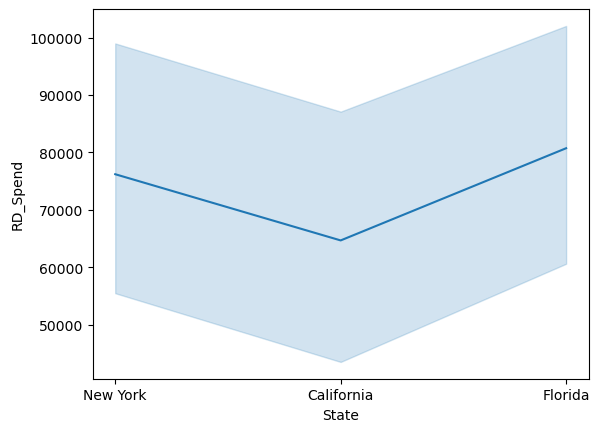

In [264]:
sns.lineplot(x='State',y='RD_Spend',data=data)

<AxesSubplot: xlabel='State', ylabel='Administration'>

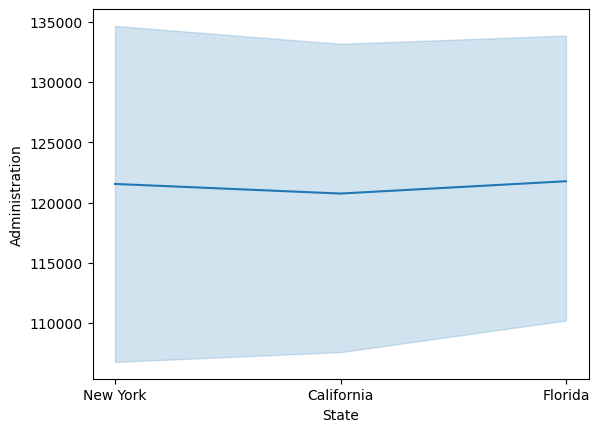

In [265]:
sns.lineplot(x='State',y='Administration',data=data)

<AxesSubplot: xlabel='State', ylabel='Marketing_Spend'>

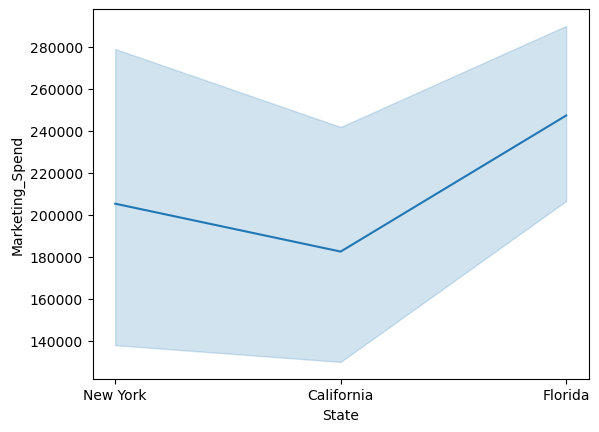

In [266]:
sns.lineplot(x='State',y='Marketing_Spend',data=data)

### Conclusion
It is seen that Florida spends the most in R&D, moderately in Administration and again the most in Marketing. This further proves the correlation between the independent variables and the dependent variable (Profit) and is the main reason why startups in Florida are making maximum profit when compared to New York and California. California invests the least in R&D and Marketing leading them to make lesser profits when compared to New York and Florida.

## Fitting a model

we begin by analysing the data to see if it follows the Gauss-Markov Assumptions for Linear Regression.

In [140]:
from statsmodels.stats.api import linear_rainbow
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [188]:
test_dat=data
test_dat.rename(columns={'R&D_Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)
test_dat.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [189]:
test_01=pd.get_dummies(test_dat,columns=['State'])
test_01.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Solving Dummy Variable Trap

In [190]:
test_01=test_01.drop('State_New York',axis=1)
test_01.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [63]:
test_model_01=ols("Profit ~ RD_Spend + Administration + Marketing_Spend + State_California + State_Florida",data=test_01).fit()

In [72]:
test_model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        12:17:55   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
State_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
import seaborn as sns

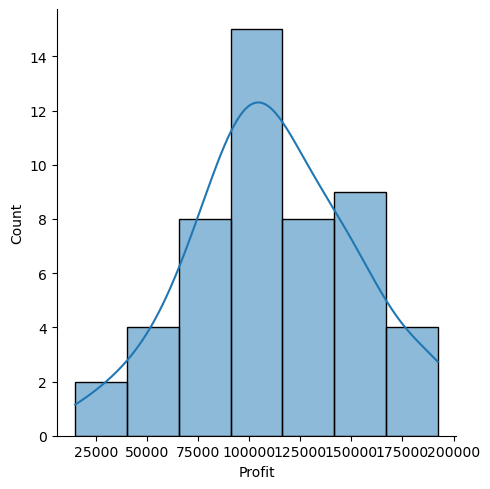

In [113]:
sns.displot(test_01['Profit'],kde=True)

### Testing Linearity

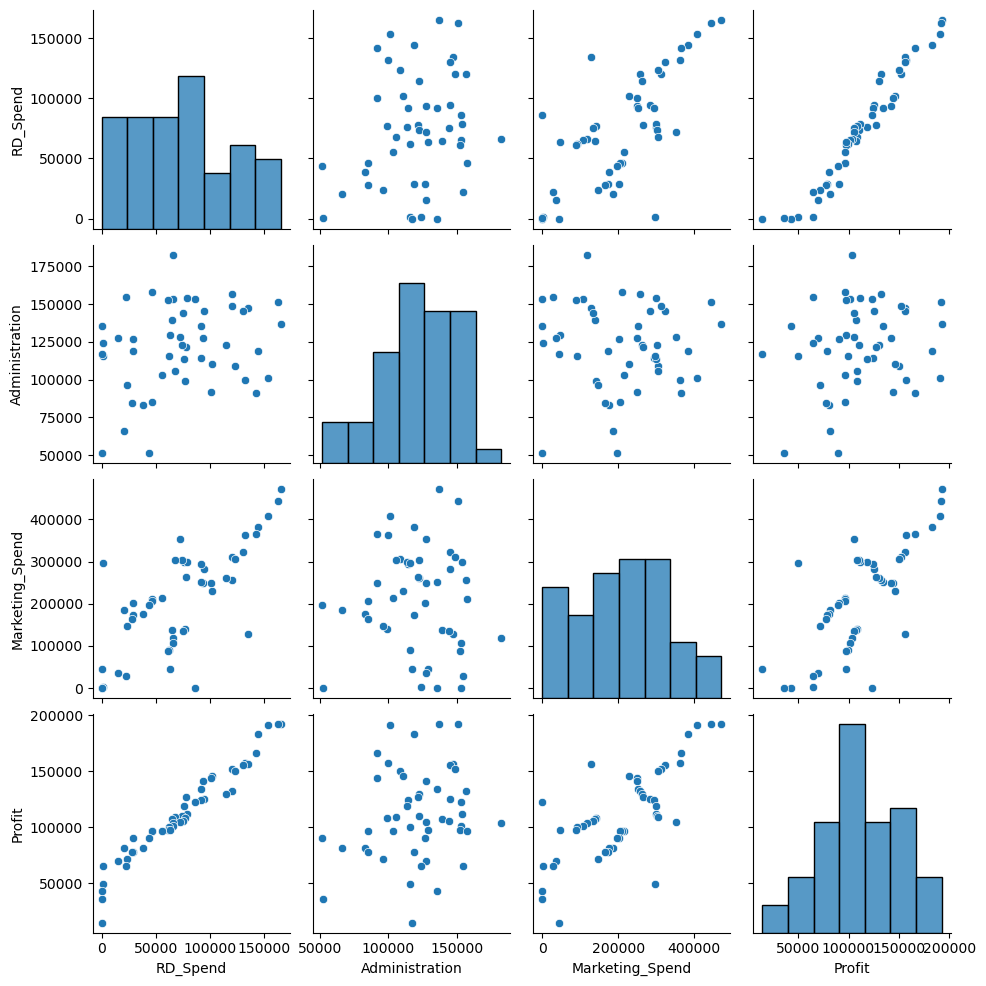

In [116]:
sns.pairplot(test_01.drop(['State_Florida','State_California'],axis=1))

It is seen that one of the predictors have a non-linear relationship (Administration). On attempting to transform this predictor it is seen that it is purely non-linear.

### Testing homoscedacticity

In [117]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

In [122]:
resid=test_model_01.resid
lm,lm_pvalue,fvalue,f_pvalue=het_breuschpagan(resid,test_01.drop('Profit',axis=1))

In [123]:
print("Breusch-Pagan test results:")
print("LM test statistic: {:.4f}".format(lm))
print("LM test p-value: {:.4f}".format(lm_pvalue))
print("F test statistic: {:.4f}".format(fvalue))
print("F test p-value: {:.4f}".format(f_pvalue))

Breusch-Pagan test results:
LM test statistic: 10.2121
LM test p-value: 0.0370
F test statistic: 2.3100
F test p-value: 0.0596


H0: Homoscedasticity exists.  
H1: Heteroscedasticity exists.  
Since the p-value is greater than 0.05.  
Null hypothesis is not rejected.

### Testing normality

In [124]:
from scipy.stats import shapiro

In [128]:
stat,p=shapiro(test_01['RD_Spend'])
print("P-Value: ",p)

P-Value:  0.18005183339118958


In [129]:
stat,p=shapiro(test_01['Administration'])
print("P-Value: ",p)

P-Value:  0.23660743236541748


In [130]:
stat,p=shapiro(test_01['Marketing_Spend'])
print("P-Value: ",p)

P-Value:  0.3450772166252136


In [131]:
stat,p=shapiro(test_01['Profit'])
print("P-Value: ",p)

P-Value:  0.766564130783081


H0: Data follows normal distribution.  
H1: Data does not follow normal distribution.  
Since p-value > 0.05  
H0 is not rejected.

Due to the presence of a non-linear relationship, we can try Generalized Additive Model to try and see if a better model exists.

In [206]:
from pygam import GAM,s,l

In [191]:
x=test_01.drop('Profit',axis=1)
y=test_01['Profit']

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [230]:
test_model_03=GAM(l(0)+s(1)+s(2)+l(3)+l(4))
test_model_03.fit(x,y)
print(test_model_03.summary())

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.9497
Link Function:                     IdentityLink Log Likelihood:                                  -955.0046
Number of Samples:                           50 AIC:                                             1947.9088
                                                AICc:                                            1973.0694
                                                GCV:                                        203897730.7851
                                                Scale:                                       78700026.4282
                                                Pseudo R-Squared:                                   0.9683
Feature Function                  Lam

/var/folders/8f/tvqw0rf54s5ck_0329kvzydw0000gn/T/ipykernel_95876/199186468.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(test_model_03.summary())


In [231]:
from sklearn.metrics import r2_score

In [232]:
y_pred=test_model_03.predict(x)
resid=y-y_pred
n=len(y)
p=x.shape[1]
r2=r2_score(y,y_pred)
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

R-squared: 0.9683140321474348
Adjusted R-squared: 0.9647133539823706


### Addressing the multicollinearity

In [235]:
test_02=data.drop('Marketing_Spend',axis=1)
test_02.head()

,RD_Spend,Administration,State,Profit
0,165349.20,136897.80,New York,192261.83
1,162597.70,151377.59,California,191792.06
2,153441.51,101145.55,Florida,191050.39
3,144372.41,118671.85,New York,182901.99
4,142107.34,91391.77,Florida,166187.94


In [238]:
test_02=pd.get_dummies(test_02,columns=['State'])
test_02.head()

,RD_Spend,Administration,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,192261.83,0,0,1
1,162597.70,151377.59,191792.06,1,0,0
2,153441.51,101145.55,191050.39,0,1,0
3,144372.41,118671.85,182901.99,0,0,1
4,142107.34,91391.77,166187.94,0,1,0


In [240]:
test_02.drop('State_New York',axis=1,inplace=True)
test_02.head()

,RD_Spend,Administration,Profit,State_California,State_Florida
0,165349.20,136897.80,192261.83,0,0
1,162597.70,151377.59,191792.06,1,0
2,153441.51,101145.55,191050.39,0,1
3,144372.41,118671.85,182901.99,0,0
4,142107.34,91391.77,166187.94,0,1


In [241]:
test_model_04=ols("Profit ~ RD_Spend + Administration + State_California + State_Florida",data=test_02).fit()

In [242]:
test_model_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.90e-28
Time:                        16:32:24   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.457e+04   6445.883      8.465      0.000    4.16e+04    6.75e+04
RD_Spend             0.8609      0.031     27.665      0.000       0.798       0.924
Administration      -0.0527      0.050     -1.045      0.301      -0.154       0.049
State_California    39.3434   3309.047      0.012      0.991   -6625.420    6704.106
State_Florida     1130.4509   3344.220      0.338      0.737   -5605.154    7866.055
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     7.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is seen that even though the R&D investment might be correlated with Marketing Spend, we do not have sufficient data to further investigate the cause for this correlation, but it is seen that dropping marketing spend reduces the performance of the model, leading to the conclusion that it does provide useful information to the model which helps it predict better.

### Model Conclusion
Due to the strong correlation between R&D Spend and Profit, the linear model works really well in predicting the model, but since there is non-linearity present in the dataset with respect to Administration and Profit, a better Model can be used instead of the Linear regression model.  
Here, I have tried using a General Additive Model which can use smoothing curve functions to model the non-linear relationship between Administration and Profit which helped the final model predict the values better than the Linear Regression model.